# 📦 Amazon Logistics Simulation – SABES San Felipe (v3.2 · 2025)

**Universidad del SABES – Campus San Felipe**  
_Licenciatura en Ingeniería Logística · Logística y Cadena de Valor_

---

In [1]:
# ============================================================
# 💡 INSTRUCCIONES DE USO – SIMULACIÓN LOGÍSTICA SABES
# ============================================================
from IPython.display import HTML, display
display(HTML('''
<div style="background-color:#f5f5f5;border-left:6px solid #146EB4;padding:14px;border-radius:6px;font-family:'Amazon Ember','Arial Rounded MT',sans-serif;font-size:15px;color:#333;">
<p><b>💡 Instrucciones:</b></p>
<ul style="margin-top:6px;">
<li>Ejecute las celdas <b>en orden de arriba hacia abajo</b>.</li>
<li>Los diagramas y resultados se generarán automáticamente en la carpeta <code>/results/</code>.</li>
<li>Al finalizar, se creará un archivo <b>PDF bilingüe institucional</b> con el encabezado SABES × Amazon.</li>
<li>Puede abrir este notebook directamente en Google Colab mediante el botón <b>“Abrir en Colab”</b> del repositorio.</li>
</ul>
<p style="margin-top:8px; font-size:13px; color:#555;">🔸 Este proyecto forma parte de la asignatura <b>Logística y Cadena de Valor</b> – Universidad del SABES, Campus San Felipe (2025).</p>
</div>
'''))

## 🏫 Banner institucional bilingüe

Sección informativa de identidad SABES × Amazon (logo, texto bilingüe, QR institucional).

In [2]:
from IPython.display import HTML, display
display(HTML('''
<div style="border-radius:8px;padding:18px;background:linear-gradient(90deg,#232f3e,#131921);color:white;font-family:'Amazon Ember',sans-serif;">
<h2 style="margin:0;font-weight:700;">Amazon Logistics × Universidad del SABES</h2>
<p style="margin:4px 0 8px 0;">Campus San Felipe · Licenciatura en Ingeniería Logística · Simulación Académica 2025</p>
<p style="font-size:14px;color:#ddd;">This notebook forms part of the academic project <b>Amazon Logistics Simulation 2025</b>. Educational Use Only.</p>
</div>
'''))

## ⚙️ Bloque de simulación logística (base)
Aquí irían las funciones y cálculos principales de las rutas de transporte, nodos, etc.

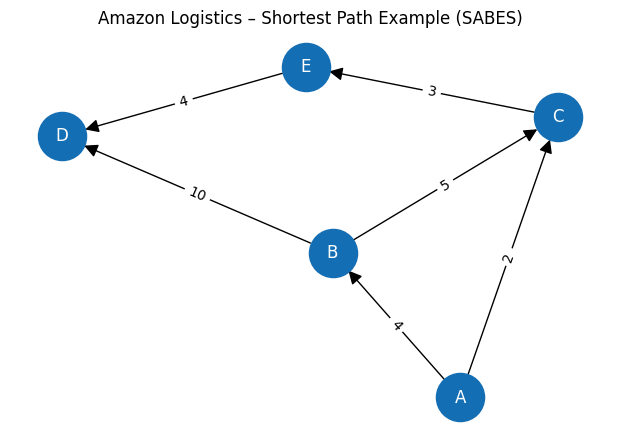

In [3]:
# Ejemplo mínimo de simulación de red logística (puedes sustituirlo por tu script real)
import networkx as nx, matplotlib.pyplot as plt, os
os.makedirs('results', exist_ok=True)
G = nx.DiGraph()
G.add_weighted_edges_from([
 ('A','B',4),('A','C',2),('B','C',5),('B','D',10),('C','E',3),('E','D',4)
])
plt.figure(figsize=(6,4))
pos = nx.spring_layout(G, seed=42)
nx.draw(G,pos,with_labels=True,node_color='#146EB4',font_color='white',node_size=1200,arrowsize=20)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.title('Amazon Logistics – Shortest Path Example (SABES)')
plt.savefig('results/sample_network.png',dpi=300,bbox_inches='tight')
plt.show()

In [4]:
# ============================================================
# 🕓 INFORMACIÓN DE VERSIÓN Y FECHA DE GENERACIÓN
# ============================================================
from datetime import datetime
version = '3.2'
fecha_generacion = datetime.now().strftime('%d de %B de %Y')
print(f'📘 Amazon Logistics Simulation – SABES San Felipe')
print(f'🧩 Versión {version} · Generado el {fecha_generacion}')
print('Universidad del SABES · Campus San Felipe · 2025')
print('Uso educativo exclusivo – Educational Use Only')

📘 Amazon Logistics Simulation – SABES San Felipe
🧩 Versión 3.2 · Generado el 26 de October de 2025
Universidad del SABES · Campus San Felipe · 2025
Uso educativo exclusivo – Educational Use Only


In [5]:
# ============================================================
# 🔒 METADATOS DE AUTORÍA INSTITUCIONAL (OCULTO)
# ============================================================
_author_signature = {
    'autor': 'Mtro. Noé Jiménez',
    'institucion': 'Universidad del SABES – Campus San Felipe',
    'programa': 'Licenciatura en Ingeniería Logística',
    'curso': 'Logística y Cadena de Valor',
    'proyecto': 'Amazon Logistics Academic Simulation 2025',
    'version': 'v3.2',
    'licencia': 'Uso educativo exclusivo · Educational Use Only',
    'fecha_creacion': '2025-10-26',
    'hash_verificacion': 'SABES-AMZ-25-' + str(abs(hash('SABES2025_AMAZON_SIMULATION')))
}
# Para verificar autoría ejecute:
# print(_author_signature)

🚀 Amazon Mexico 2025 – Logistics & Operations Technology Center
Scenario Optimization Notebook (v3)
This Colab notebook automatically generates ALL evidence required for the assignment:

Base Scenario – Current Network
Optimistic Scenario – Reduced Costs (-10%)
Pessimistic Scenario – Veracruz Closed
Per-scenario infographic PNGs (square, high-res)
Combined comparison panel
Final executive 1:1 infographic PDF with QR for audit / traceability
All visuals are styled with Amazon-like branding (orange #FF9900, sans-serif, logistics focus).

##1. Install and import libraries

In [7]:
!pip install pulp matplotlib qrcode reportlab

import os, io, math, base64
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, FancyBboxPatch
from PIL import Image
import qrcode
from pulp import *

# High DPI for sharp exports
DPI_EXPORT = 300

# Amazon brand helpers
AMAZON_ORANGE = "#FF9900"
AMAZON_FONT = "DejaVu Sans"  # fallback similar sans-serif

amazon_logo_b64 = """iVBORw0KGgoAAAANSUhEUgAAAQwAAACUCAMAAABREOc7AAAAz1BMVEX///8AAAD+/vz8/Pz/mgHb29szMzP+/vpaWlrR0dEqKir8//+Pj4+4uLjIyMijo6P19fWHh4dnZ2fh4eH7mwD/lgDp6ek7Ozvv7+++vr5PT0+pqalwcHAjIyNhYWEQEBCZmZn57NVHR0d8fHwZGRn6qUv5tFn9//L0vGr1xXv04rjz1qL3yoryvnr46sj8/uX2q0H6oSn7nBzwnTPvskvz2Z3woiX34MbikgDukwDyxnHuogf89OftuF338tb11JTtrCr1zZ3vigDszXbpuFEc3nQYAAAMhUlEQVR4nO1baXuiShZGSkRFEEUURePa4hY1dpIZu43pvnP//2+aUzugdndcbpKZej/k0aK289ZZC6NpCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoK/49AZz5Ld31D36PDLxt/GVzPKBSMuvubbshFv2l485Snl/qDke7p5c9FPaxU863BoJWvVux64lFQIAiwVgR2pV1tV2y8SXJ0MA4aSrghfpL4o1Ee8ilLTTehVHXnGLzkcDwzrBUayZ0ig2zHw71QoTeEPiXnmnx4lUEnI9AZ9AIpmptrELRcDdkt2q2Td4jwbo+NK7ZsJMXFYwvtxkjM2C3mQ3HIIMMgdwx5LzGc7ajTaDuxqbUK208BOB3mumT6XDXF2PlAYS6TQssQyxu8LdDKskO3CR2CdmxICcV27Ja66Smrdfk0/YzNWeAdtN4o8aASMxe+11CrV2WXUeE6XLiVYzsTkwsyUDPVAeUTDT1pCMHdkRlbdd4hOGAqRgZWuIPhA6mqggy3neiStO3zgNzS0Z11+GEIMrykCC0UpoYIVT0UhqDNp3R/RQZwVT18lhN6J8hInk2mdQUytObBwhS9NBnDVAe7k2qo8imP05vJOOz5LzVDO346ba52nIxyK9XjYkMBlRT+ottqt++KYu5Omoy0BIcSsf3WRcMo327nJWdVtmZwlItMg6pWU+yh2Mo3xNMwRUaai0zpcjKEYuTKRuDWm3IN5kON9KKnwexEnGzL9lzXC6VAiK6JKvk7jpbktEQyhrpwBXnbMBzh0AZekowD5C8nQ9hnk7ZI2e10QyZXCsNhXCE6w3I5Zj3UDNCAd2eKa4shHlvUNTwGQ9pEnilG8rtw793eARmtsh1K99S4PNngG23zBsFOL60ZOQc8YBCz6I4dIBTIgEvpM7hdlJnPQ0I1nIPlDfEshzMV8Oec3A6zC4NbTb6eIiNvgJLVRUjLXR5POLOOxnRYyFZhmxGLhyQFcIVJd0OaIA1iHQAB/+7xcJjWvhhkdK7Qvh6nssXMIuDsFJtJMnIOSYIL4rt3MPtbAeWDE5baFaFj9kkyWGQUdjFiI4SuhHzKQjOs3IViSjHigAypVQN2rsJKuKrKCF5KksE6IH44xatloRInyRiwDmJzd8wMRAMxE1lt/p4MSXSHZ59pF6FpjpA+wF85GaOQ6TJ3uMWrJKGypHDdIDhpJm3W2ZEd6EhBnx2bkFICM8KUIj4kyEAxZ5Lhors8mnX4ZFqBH32rECejwysGTt91yCCbqBtOuXIXr9fSZLDvkoxeusGW84GkMKXdG941YuEnqRlI1gEtfiQuL0qKoq/wsTknTkYxYM+5lV6JDFRvlg5ymAMyeFIjZC+zBmHmcTI8uzJIz5giQ6aw4pRlPlYUkccQW7PjZOS4Ql+TDEgIw6O1xB+TccRMvINkOU0G9JFdQtHs8aacEM3LJ7oJMvjzq2qGMUzUy1cgQyscr9QSmhErltuyQherxcgQk92YDJQ4ILzEQDi1c8kAFxs3kFGjJcwhToY0klYsJv6SjPKNydCQ5KJYahpe/WQ0+UMywOxkkjjoOTDlsWjiCcK6MVfzzmT0xMYrdVIoncwz/pgMeekS0svaI3lGzEji11iy4pUO9B8zk9gNHI+cl5KhFQ6s4oAMJMfw+oxBRpMmDzDSgSajyfXJENljh68tWs4lQ4je5lMeaoYIGplcU4tXm6Ly6YgIY3CDoqnHDckQKljiexJ2cyYZIofEtd+JQk06qm4lwYWG+IZkOn4iA72Bz4hV12xTwuIrqRL+92QQWWVRLqpI4St5uJH1WacShk2n4AUay+LFWQy19Hrt+m3JCMTOC5wMYfHsSvOtZDgilvD7BW+UGiGqbo5RvmIbbnL2PEu3kWAuWbXegAyxc5uRIe+HG+6FZNAcOx6w8rTlyO03GEGpgG/A6/x4GszKxF15LnmfcUvNYHoQyLRjZF9IBquxpd2wW1LvxDVmw4HyX96Ns7dS8howuDEZmtwoietB/H0AvWc732cU6fh4ak4u/J1i5jiGLk5fRd1qJ6YbseX+iWiCb8c9O/mOjFx/vZUMGU0yDdszyonatVv+FRnVIHEexVKh0BNa1HJvTkbs9WlmNEq9CiGB/a1kaDHl6o7SNSC+2fw1GTE7y8SH87B8QzLQ4Za6ghKSHL6ZDCP9pg2EEp/u3AQZ3W43dgCUDC089sKtx3d8y9ok/cI002jy2e887MHeTIaWfg+ZyYmMmlxjUjI6jfywFzabdrlSHdCfFjAy0JE34SKbvW0Jn9r6oKCxVxFt+ub77YWam7zY6eY99vKjWyKZldPJjFpDO3az7xZ61YYgQ3NLKeXqgPdKv4W/yeWOW4pFutzQ4/cRFZcehigjKBmxC+EwnZrwWrzejgnTKIGIyIZFOj362LvLlzETlqabpq7r8AG24VRaZZctgcIEny351gGJ+HdARudyMmDlZoVevxTzlaZLrvqdfKPHz8Kt5inYy0OtzhrueLkpGsRZu/ZwQPxE7q7n0LtyuzVgIiHNgI4mJkIDJjQLPpl4kBEg3kMzevwdeLFaNuK/3Cmz7fT4Yg5rGJ7707EkXMOxbbvpGGI6A7JBvFEiq0HgidPhDdrJBvxDsCaesiBGIcOIV2TIskAfMA0mfLAQ/R6H54TlXqlsO16ikoPNUsifRXm04Rq/VnkP6Lplmf3ZfDGd3t/fL+bLFeEkDXSDX/KdBUQVw9RvMbml9eeT9cMmm8362Vpt8/VxFoGanNjJLXbwJlgoMqOnmQlsYMu+JiW6bq4Wz8ABBSbE99cryzxBxrtDN1Fk/evf20nfwg7/qqdjRvNnEN/PZhkXGA977cOSAQqB0P5bzf++2JnYz11tYgiky6+bh4f1+vHlZTIZr59rjIyrqt9VYenINKPFxvefX/emBYRcb+79fLbcr6IIGLbM1ewFu47nj0wG+E9w+dHr11p2u37tE82gm4Xmy6bGWRYEEzINfNBnX/3sh/YZGhZdN61otgbrrq0Xyx1sG7IB7Eyty0KMhQMrwrkdNkBkLb/4Nf/FMt/1vwj+CObyhUS/9XS2MokgSNcusxlgFQKKBUQv5hF8Xn4FMhYfnwxIhbT9dOsTF/fyuoxo0qhdYChgfzjBMvfzydfsdm6Z1uwB2J5hiq638VsAS4528x+1LOZjs548rSADMS+xbh1pWCnu1xvQt+0cTOUnhJMf0YWO6B8AApsGC9+/sHTA32BzAWP57UhyzImzFl+i5WK9qfm1mr+dghvdTbI1f6qZ183sbggTlAP8KMkVs9+/EfeBnR/Igu2fVFvkaLFI4FYQSeZxXQoN4CyJipGWaPkN9AynW37t+dXUIq2/zma3s2uG7tsCvP9++oBVA6eMvv9XbbyY7cyISUw9ohmZ2AeSkEwAeZuGOaAvT8A2VsunyXdwQMzoJn2IS8AzcDP+wFE1DRwHdZIc8ezZ97fPjz9n+x0wAI+xAuj4r8U1A7eBLpDLG8vc7frL+f2aEEEo9TePM9NCoDXRN/g+//geIw44/938ZePH6it/u30eT37OZ/0d4QQUCCdSWN8tkktAFYJpgFJ9+vjMCjIy1q+NX/eQZCFcvkLJNll9KjIgL0CWvp+Pt1THgQyQCYtXq31fP06mr/PZbLbsSyyXs9n8dTGdjB82W+iXpTUZ/gM53B5faJg46Xqq+eul9YnMBANyT2SZ/afxpsathTpC6lXhw+Zh/eXLmOLLev38sGFFKfYzhEI66nEB+QoixR/w8eJv5tF7C3cOwAqi/uzbhgSWeAHOHUkC8Sf0D3Tfjud9XKFRVdD1/nYzBSP5NLFEgmrHbvm63vrZE6gdaeK0/fU8ne1AKyBPodKb+n+29zvrQ9dop4BoHDWj3Wz6TI7+iOjHGcK+czzf4VQexnPZEZo9RaRQeVe5zoKOr71wNmFCbfE0+bH1TypIynxq3/9+2pMkDejEuSbVDIT9Mml6Z8nOAImXGrkSxR+i5evLj03CPmLk1LiFbJ7//rmMSIqKRMqt0/nInaL2KX1GCliC3exp+vjl4WGT9fndLlUXEl4e1uP7+XKFo8Un9ApvAUkyca4VrSClWNxPXsZjCK4Y6/F4Ml3g2z2oRmlq/t67vTVI9cUKEfCLUbTa72nGtV+tokgnt3r4Ouiimv+TgJCBS1aTXmsmYoJFXyrTUuXTlOeXgEmrs4/kTbLOq3chv/6/byQKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCjfEfwGLRvP9KYN+cAAAAABJRU5ErkJggg=="""


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 98.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 74.2 MB/s eta 0:00:00


## 2. Core network data (do not modify)

In [8]:
COSTOS_BASE = {
    ('CDMX', 'Toluca'): 8.0, ('CDMX', 'León'): 18.5,
    ('CDMX', 'San Luis Potosí'): 24.0, ('CDMX', 'Cancún'): 135.0,
    ('CDMX', 'Mérida'): 142.0, ('CDMX', 'Veracruz'): 38.0,
    ('Monterrey', 'Toluca'): 52.0, ('Monterrey', 'León'): 45.0,
    ('Monterrey', 'San Luis Potosí'): 33.0, ('Monterrey', 'Cancún'): 128.0,
    ('Monterrey', 'Mérida'): 135.0, ('Monterrey', 'Veracruz'): 85.0,
    ('Guadalajara', 'Toluca'): 38.0, ('Guadalajara', 'León'): 24.0,
    ('Guadalajara', 'San Luis Potosí'): 42.0, ('Guadalajara', 'Cancún'): 148.0,
    ('Guadalajara', 'Mérida'): 155.0, ('Guadalajara', 'Veracruz'): 72.0,
    ('Querétaro', 'Toluca'): 12.0, ('Querétaro', 'León'): 16.0,
    ('Querétaro', 'San Luis Potosí'): 22.0, ('Querétaro', 'Cancún'): 142.0,
    ('Querétaro', 'Mérida'): 148.0, ('Querétaro', 'Veracruz'): 45.0,
    ('Puebla', 'Toluca'): 18.0, ('Puebla', 'León'): 35.0,
    ('Puebla', 'San Luis Potosí'): 48.0, ('Puebla', 'Cancún'): 125.0,
    ('Puebla', 'Mérida'): 132.0, ('Puebla', 'Veracruz'): 28.0,
    ('Tijuana', 'Toluca'): 165.0, ('Tijuana', 'León'): 152.0,
    ('Tijuana', 'San Luis Potosí'): 148.0, ('Tijuana', 'Cancún'): 235.0,
    ('Tijuana', 'Mérida'): 242.0, ('Tijuana', 'Veracruz'): 192.0,
}

DEMANDA_BASE = {
    'Toluca': 27000, 'León': 21000, 'San Luis Potosí': 17000,
    'Cancún': 17000, 'Mérida': 18000, 'Veracruz': 20000
}

OFERTA_BASE = {
    'CDMX': 63000, 'Monterrey': 43000, 'Guadalajara': 37000,
    'Querétaro': 37000, 'Puebla': 22000, 'Tijuana': 22000
}

ORIGENES = list(OFERTA_BASE.keys())
DESTINOS = list(DEMANDA_BASE.keys())


## 3. Functions: data generation, solver, plotting, panel, QR, PDF

In [11]:
def generar_datos_estudiante(student_id):
    factor_costos = 0.85 + (student_id % 30) * 0.01

    demanda = {
        d: int(DEMANDA_BASE[d] * (1 + (student_id % 10) / 10))
        for d in DESTINOS
    }

    oferta = {
        o: int(OFERTA_BASE[o] * (1 + (student_id % 8) / 10))
        for o in ORIGENES
    }

    costos = {}
    for (o,d),c in COSTOS_BASE.items():
        costos[(o,d)] = round(c * factor_costos, 2)

    return {
        "id": student_id,
        "demanda": demanda,
        "oferta": oferta,
        "costos": costos,
    }


def resolver_problema(datos, multiplicador_costo=1.0, cerrar_veracruz=False):
    demanda = datos["demanda"].copy()
    oferta  = datos["oferta"].copy()
    costos  = {k:v*multiplicador_costo for k,v in datos["costos"].items()}

    if cerrar_veracruz:
        lost = demanda["Veracruz"]
        demanda["Veracruz"] = 0
        others = [d for d in DESTINOS if d != "Veracruz"]
        total_others = sum(demanda[d] for d in others)
        for d in others:
            demanda[d] += int(lost * demanda[d] / total_others)

    prob = LpProblem("Amazon", LpMinimize)
    rutas = [(i,j) for i in ORIGENES for j in DESTINOS]
    x = LpVariable.dicts("x", rutas, lowBound=0, cat="Integer")

    prob += lpSum([costos[(i,j)] * x[(i,j)] for (i,j) in rutas])

    for j in DESTINOS:
        prob += lpSum([x[(i,j)] for i in ORIGENES]) >= demanda[j]

    for i in ORIGENES:
        prob += lpSum([x[(i,j)] for j in DESTINOS]) <= oferta[i]

    prob.solve(PULP_CBC_CMD(msg=0))

    asign = {(i,j):int(x[(i,j)].varValue) for (i,j) in rutas if x[(i,j)].varValue and x[(i,j)].varValue>0}
    return {
        "status": LpStatus[prob.status],
        "cost": value(prob.objective),
        "assign": asign,
    }


def draw_logo(ax, x, y, size=0.12):
    logo_data = base64.b64decode(amazon_logo_b64)
    img = Image.open(io.BytesIO(logo_data))
    ax.imshow(img, extent=(x, x+size, y, y+size), aspect='auto', zorder=10)


def plot_scenario_square(datos, sol, title_text, outfile):
    # square figure
    fig, ax = plt.subplots(figsize=(6.4,6.4), dpi=300)
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.axis('off')
    fig.patch.set_facecolor("white")
    ax.set_facecolor("white")

    # background card (soft shadow style feel)
    card = FancyBboxPatch(
        (0.5,0.5), 9, 9,  # Corrected: Added width and height as separate arguments
        boxstyle="round,pad=0.4,rounding_size=0.6",
        linewidth=0,
        facecolor="white",
        edgecolor="none",
        mutation_aspect=1,
        zorder=0
    )
    ax.add_patch(card)

    # positions
    pos_o = {
        'CDMX': (2, 8.5), 'Monterrey': (2, 7.0), 'Guadalajara': (2, 5.5),
        'Querétaro': (2, 4.0), 'Puebla': (2, 2.5), 'Tijuana': (2, 1.0)
    }
    pos_d = {
        'Toluca': (8, 8.5), 'León': (8, 7.0), 'San Luis Potosí': (8, 5.5),
        'Cancún': (8, 4.0), 'Mérida': (8, 2.5), 'Veracruz': (8, 1.0)
    }

    colors = {
        'CDMX': '#00C9FF',       # cyan
        'Monterrey': '#FF4F81',  # magenta/rose
        'Guadalajara': '#8E44AD',# violet
        'Querétaro': '#2ECC71',  # emerald
        'Puebla': '#F1C40F',     # gold
        'Tijuana': '#FF7F0E',    # orange
    }

    assigns = sol["assign"]
    if assigns:
        max_flow = max(assigns.values())
    else:
        max_flow = 1

    # draw arrows
    for (o,d),flow in assigns.items():
        x1,y1 = pos_o[o]
        x2,y2 = pos_d[d]

        thickness = max(2.5, 2 + (flow/max_flow)*6)

        arrow = FancyArrowPatch(
            (x1+0.3,y1),
            (x2-0.3,y2),
            arrowstyle='->',
            linewidth=thickness,
            color=colors[o],
            alpha=0.8,
            mutation_scale=18,
            zorder=4
        )
        ax.add_patch(arrow)

        mx,my = (x1+x2)/2, (y1+y2)/2
        ax.text(mx,my, f"{flow/1000:.1f}k",
                ha="center", va="center",
                fontsize=8, color="#000",
                bbox=dict(boxstyle="round,pad=0.15",
                          fc="white", ec=colors[o],
                          lw=1, alpha=0.9),
                zorder=5)

    # draw origin / destination nodes
    for o,(x,y) in pos_o.items():
        circ = plt.Circle((x,y),0.35,fc=colors[o],ec='black',lw=1.5,zorder=6)
        ax.add_patch(circ)
        ax.text(x,y,o,ha='center',va='center',
                fontsize=8,fontweight='bold',color='black',zorder=7)

    for d,(x,y) in pos_d.items():
        circ = plt.Circle((x,y),0.35,fc='white',ec='black',lw=1.5,zorder=6)
        ax.add_patch(circ)
        ax.text(x,y,d,ha='center',va='center',
                fontsize=8,fontweight='bold',color='black',zorder=7)

    # Amazon header bar
    ax.add_patch(FancyBboxPatch(
        (0.5,9.2),9, 0.6, # Corrected: Added width and height as separate arguments
        boxstyle="round,pad=0.3,rounding_size=0.3",
        linewidth=0,
        facecolor=AMAZON_ORANGE,
        alpha=1.0,
        zorder=8
    ))

    draw_logo(ax, 0.6, 9.25, size=0.5)

    ax.text(1.3,9.5,
            "Amazon Mexico 2025 – Logistics & Operations Technology Center\n" +
            title_text +
            f"\nCost: ${sol['cost']:,.2f} MXN",
            ha="left", va="top",
            fontsize=6.5, color="black", fontname=AMAZON_FONT,
            zorder=9)

    plt.tight_layout()
    plt.savefig(outfile, dpi=300, facecolor="white")
    plt.show()


def make_comparison_panel(base_png, opt_png, pes_png, summary_text, out_png):
    # create a 1920x1920 panel with gray bg, three columns
    panel_w = 1920
    panel_h = 1920
    bg_color = (242,242,242)  # light gray

    panel = Image.new("RGB", (panel_w, panel_h), bg_color)

    # load scenario pngs
    img_base = Image.open(base_png).resize((600,600))
    img_opt  = Image.open(opt_png).resize((600,600))
    img_pes  = Image.open(pes_png).resize((600,600))

    # paste with spacing
    panel.paste(img_base, (60, 200))
    panel.paste(img_opt,  (660,200))
    panel.paste(img_pes,  (1260,200))

    # add header + summary text
    import PIL.ImageDraw as ImageDraw
    import PIL.ImageFont as ImageFont

    draw = ImageDraw.Draw(panel)

    # attempt default font
    title = "Amazon Mexico 2025 – Logistics & Operations Technology Center\nScenario Comparison"
    draw.text((60,40), title, fill=(0,0,0))

    # summary block bottom
    draw.text((60, 850), summary_text, fill=(0,0,0))

    panel.save(out_png, format="PNG")


def generate_qr(text):
    qr = qrcode.QRCode(box_size=8, border=2)
    qr.add_data(text)
    qr.make(fit=True)
    img = qr.make_image(fill_color="black", back_color="white")
    return img


def make_pdf_infographic(panel_png, qr_text, out_pdf):
    from reportlab.pdfgen import canvas
    from reportlab.lib.pagesizes import letter
    from reportlab.lib.units import inch
    import tempfile

    # We'll render a square panel, but PDF is still vector canvas.
    # We'll center the 1920x1920 panel scaled to page width.
    c = canvas.Canvas(out_pdf, pagesize=(2000,2000))  # square-like "page"

    # draw panel
    c.drawImage(panel_png, 0, 300, width=2000, height=2000*(1920/1920), preserveAspectRatio=True, mask='auto')

    # QR bottom-left
    qr_img = generate_qr(qr_text)
    # Save QR image to a temporary file
    with tempfile.NamedTemporaryFile(suffix=".png", delete=False) as tmp_qr_file:
        qr_img.save(tmp_qr_file.name, format="PNG")
        tmp_qr_path = tmp_qr_file.name

    c.drawImage(tmp_qr_path, 50, 50, width=300, height=300, mask='auto')

    # Clean up the temporary file
    os.remove(tmp_qr_path)


    # footer text
    c.setFont("Helvetica", 28)
    c.setFillColorRGB(0,0,0)
    c.drawString(400, 200,
        "Generated automatically for academic evaluation.\n" +
        "Use: Evidence of Scenario Optimization – El Buen Fin 2025")

    c.showPage()
    c.save()

## 4. Run your student ID, generate scenarios, export PNGs and final PDF

STATUS: Optimal Optimal Optimal
COSTS:
  Base        : 10556592.0
  Optimistic  : 9500932.8
  Pessimistic : 11426366.400000002


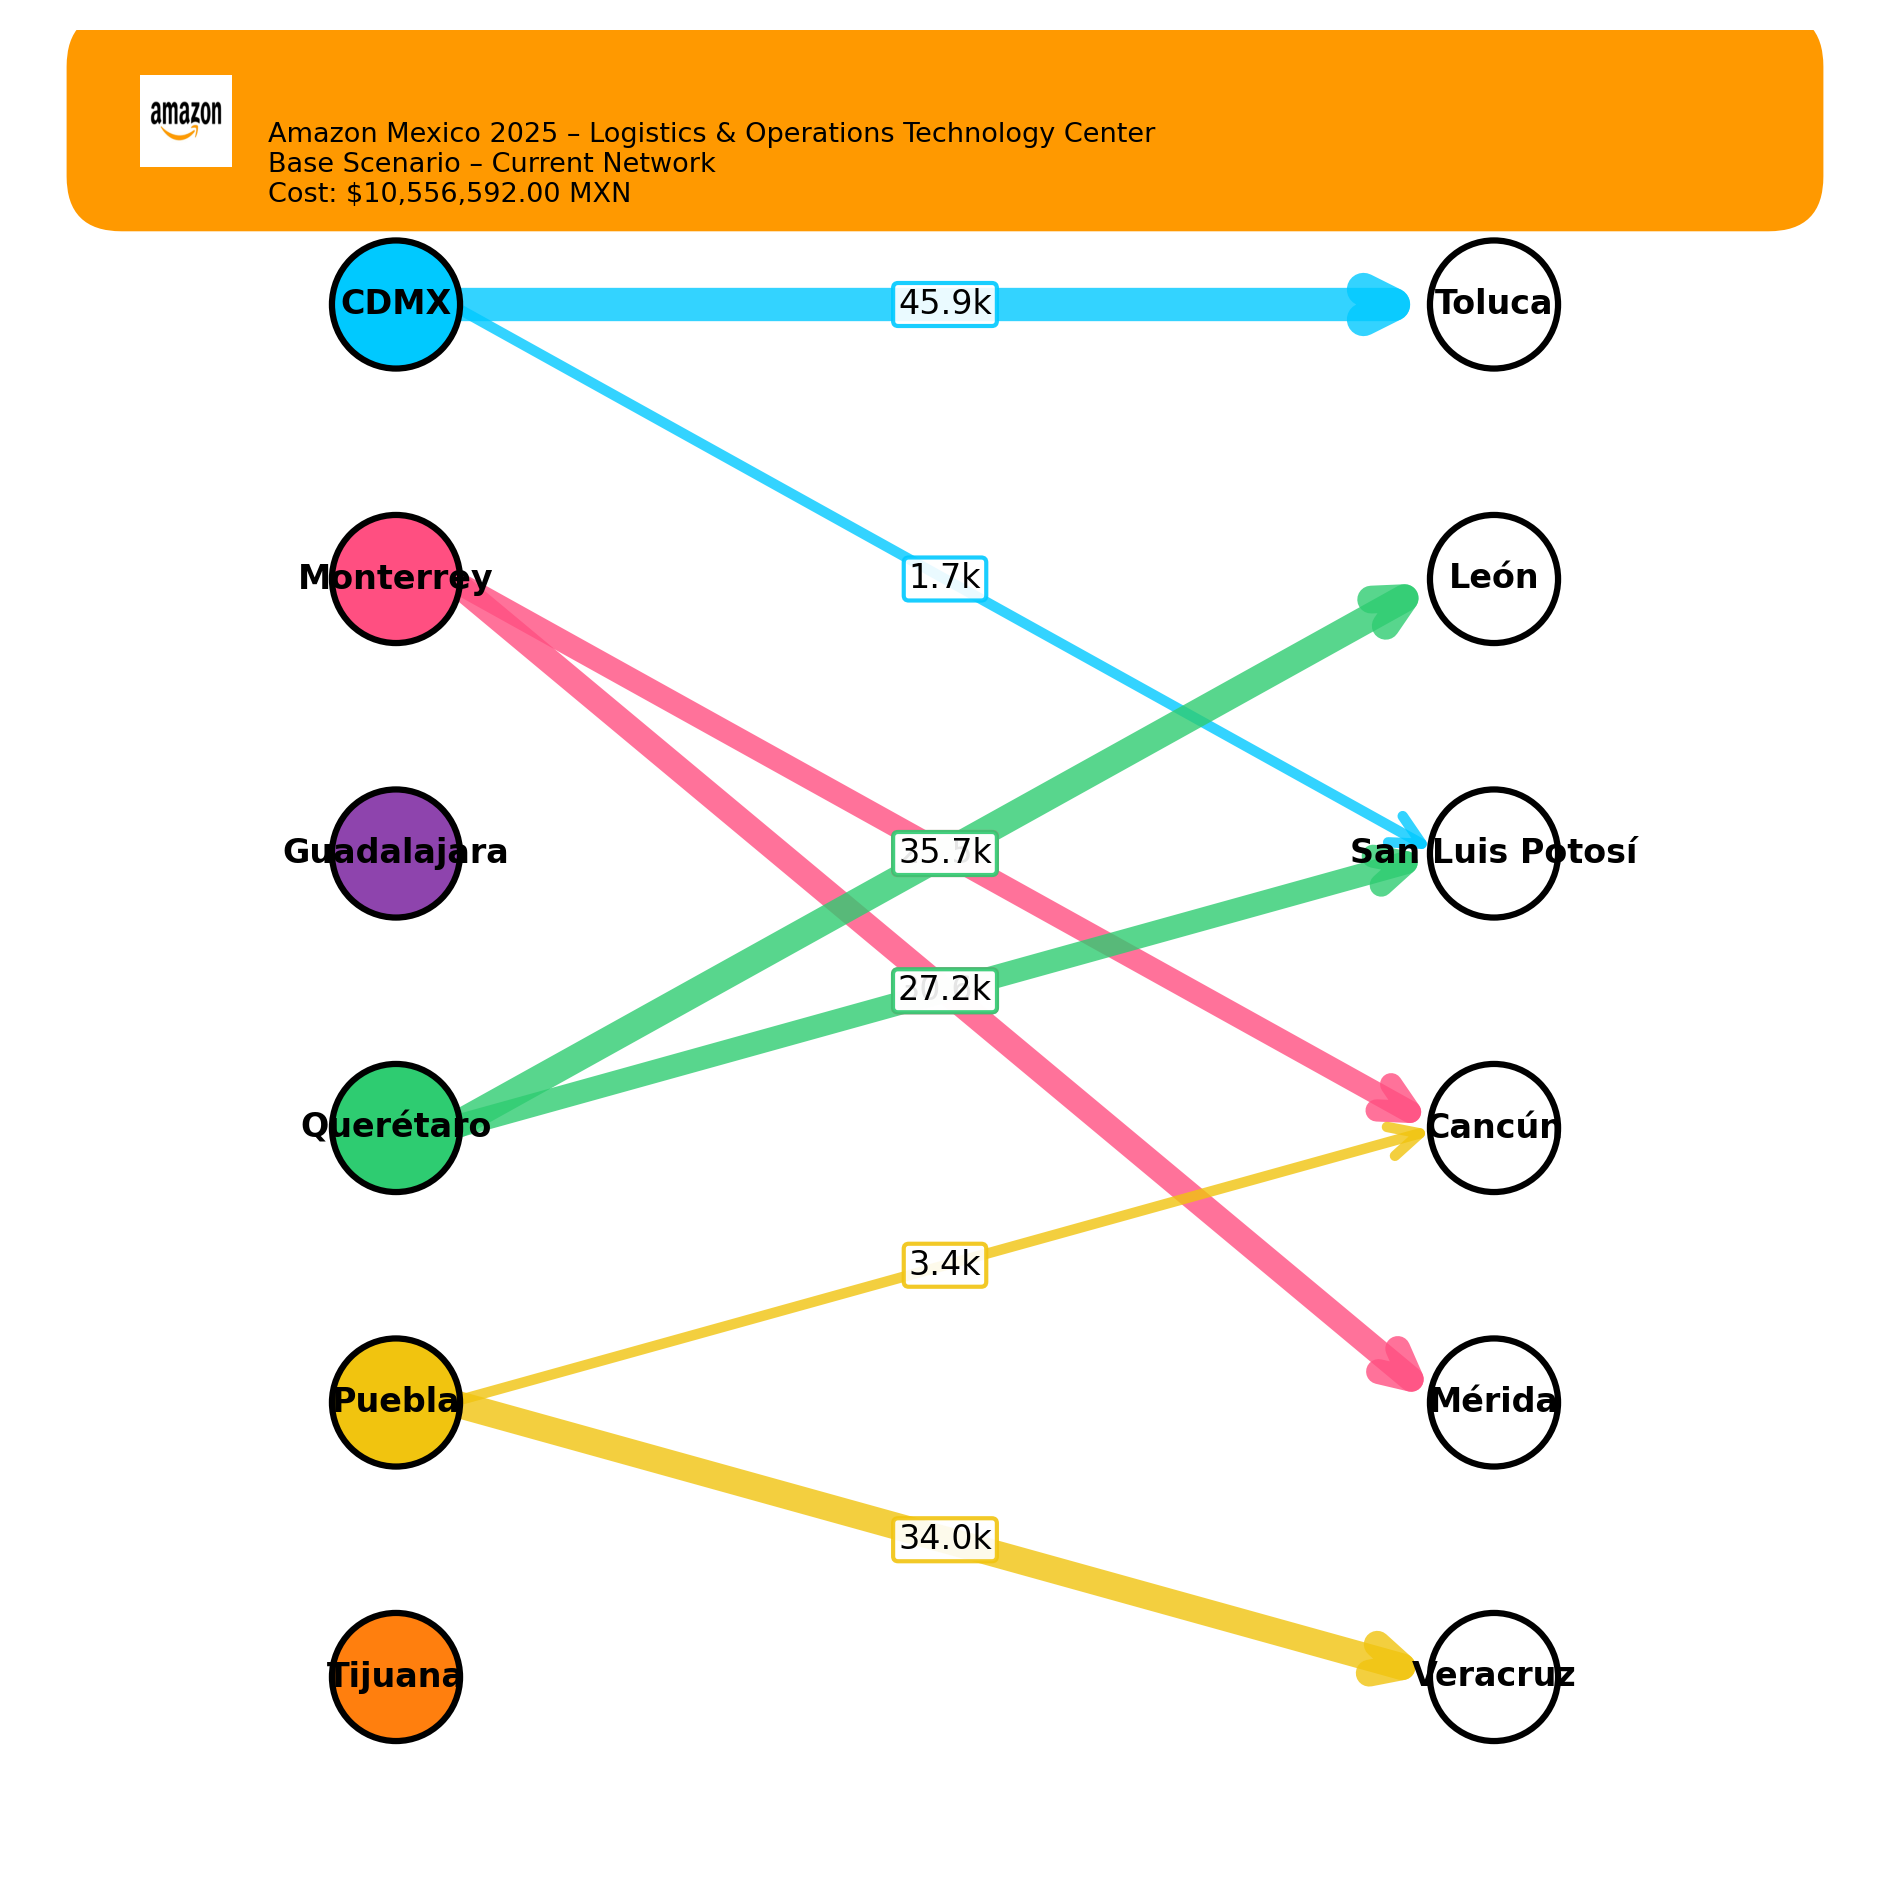

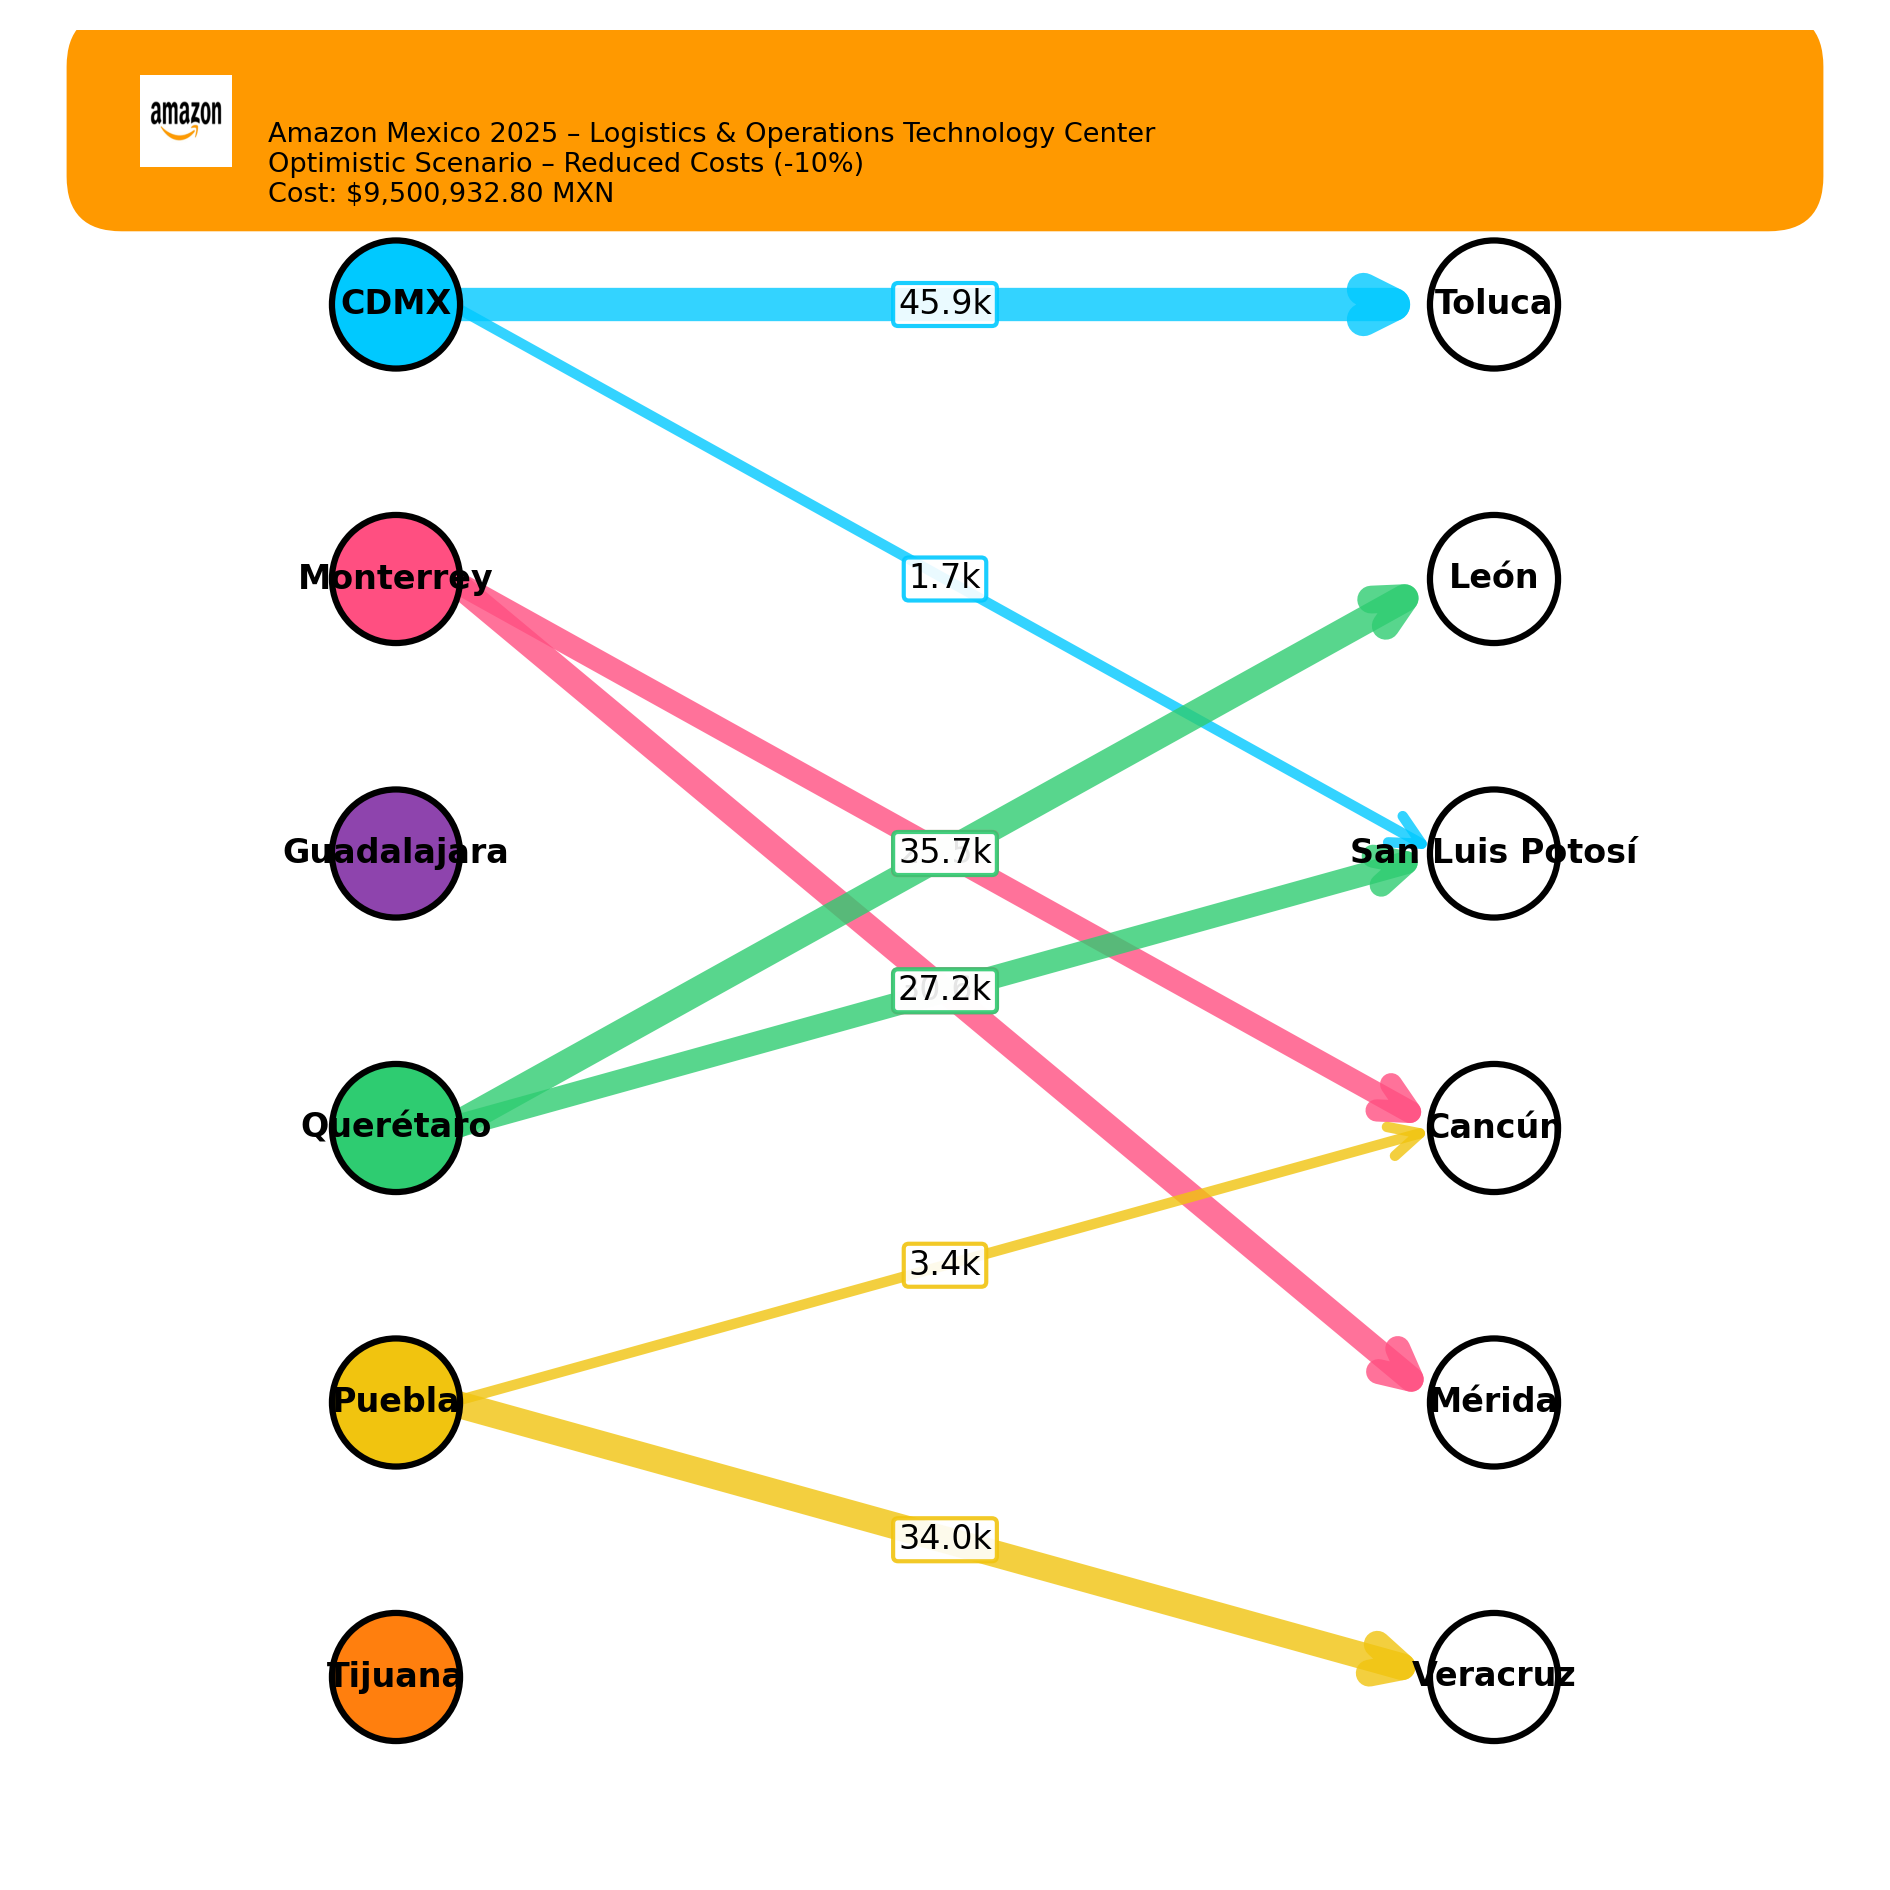

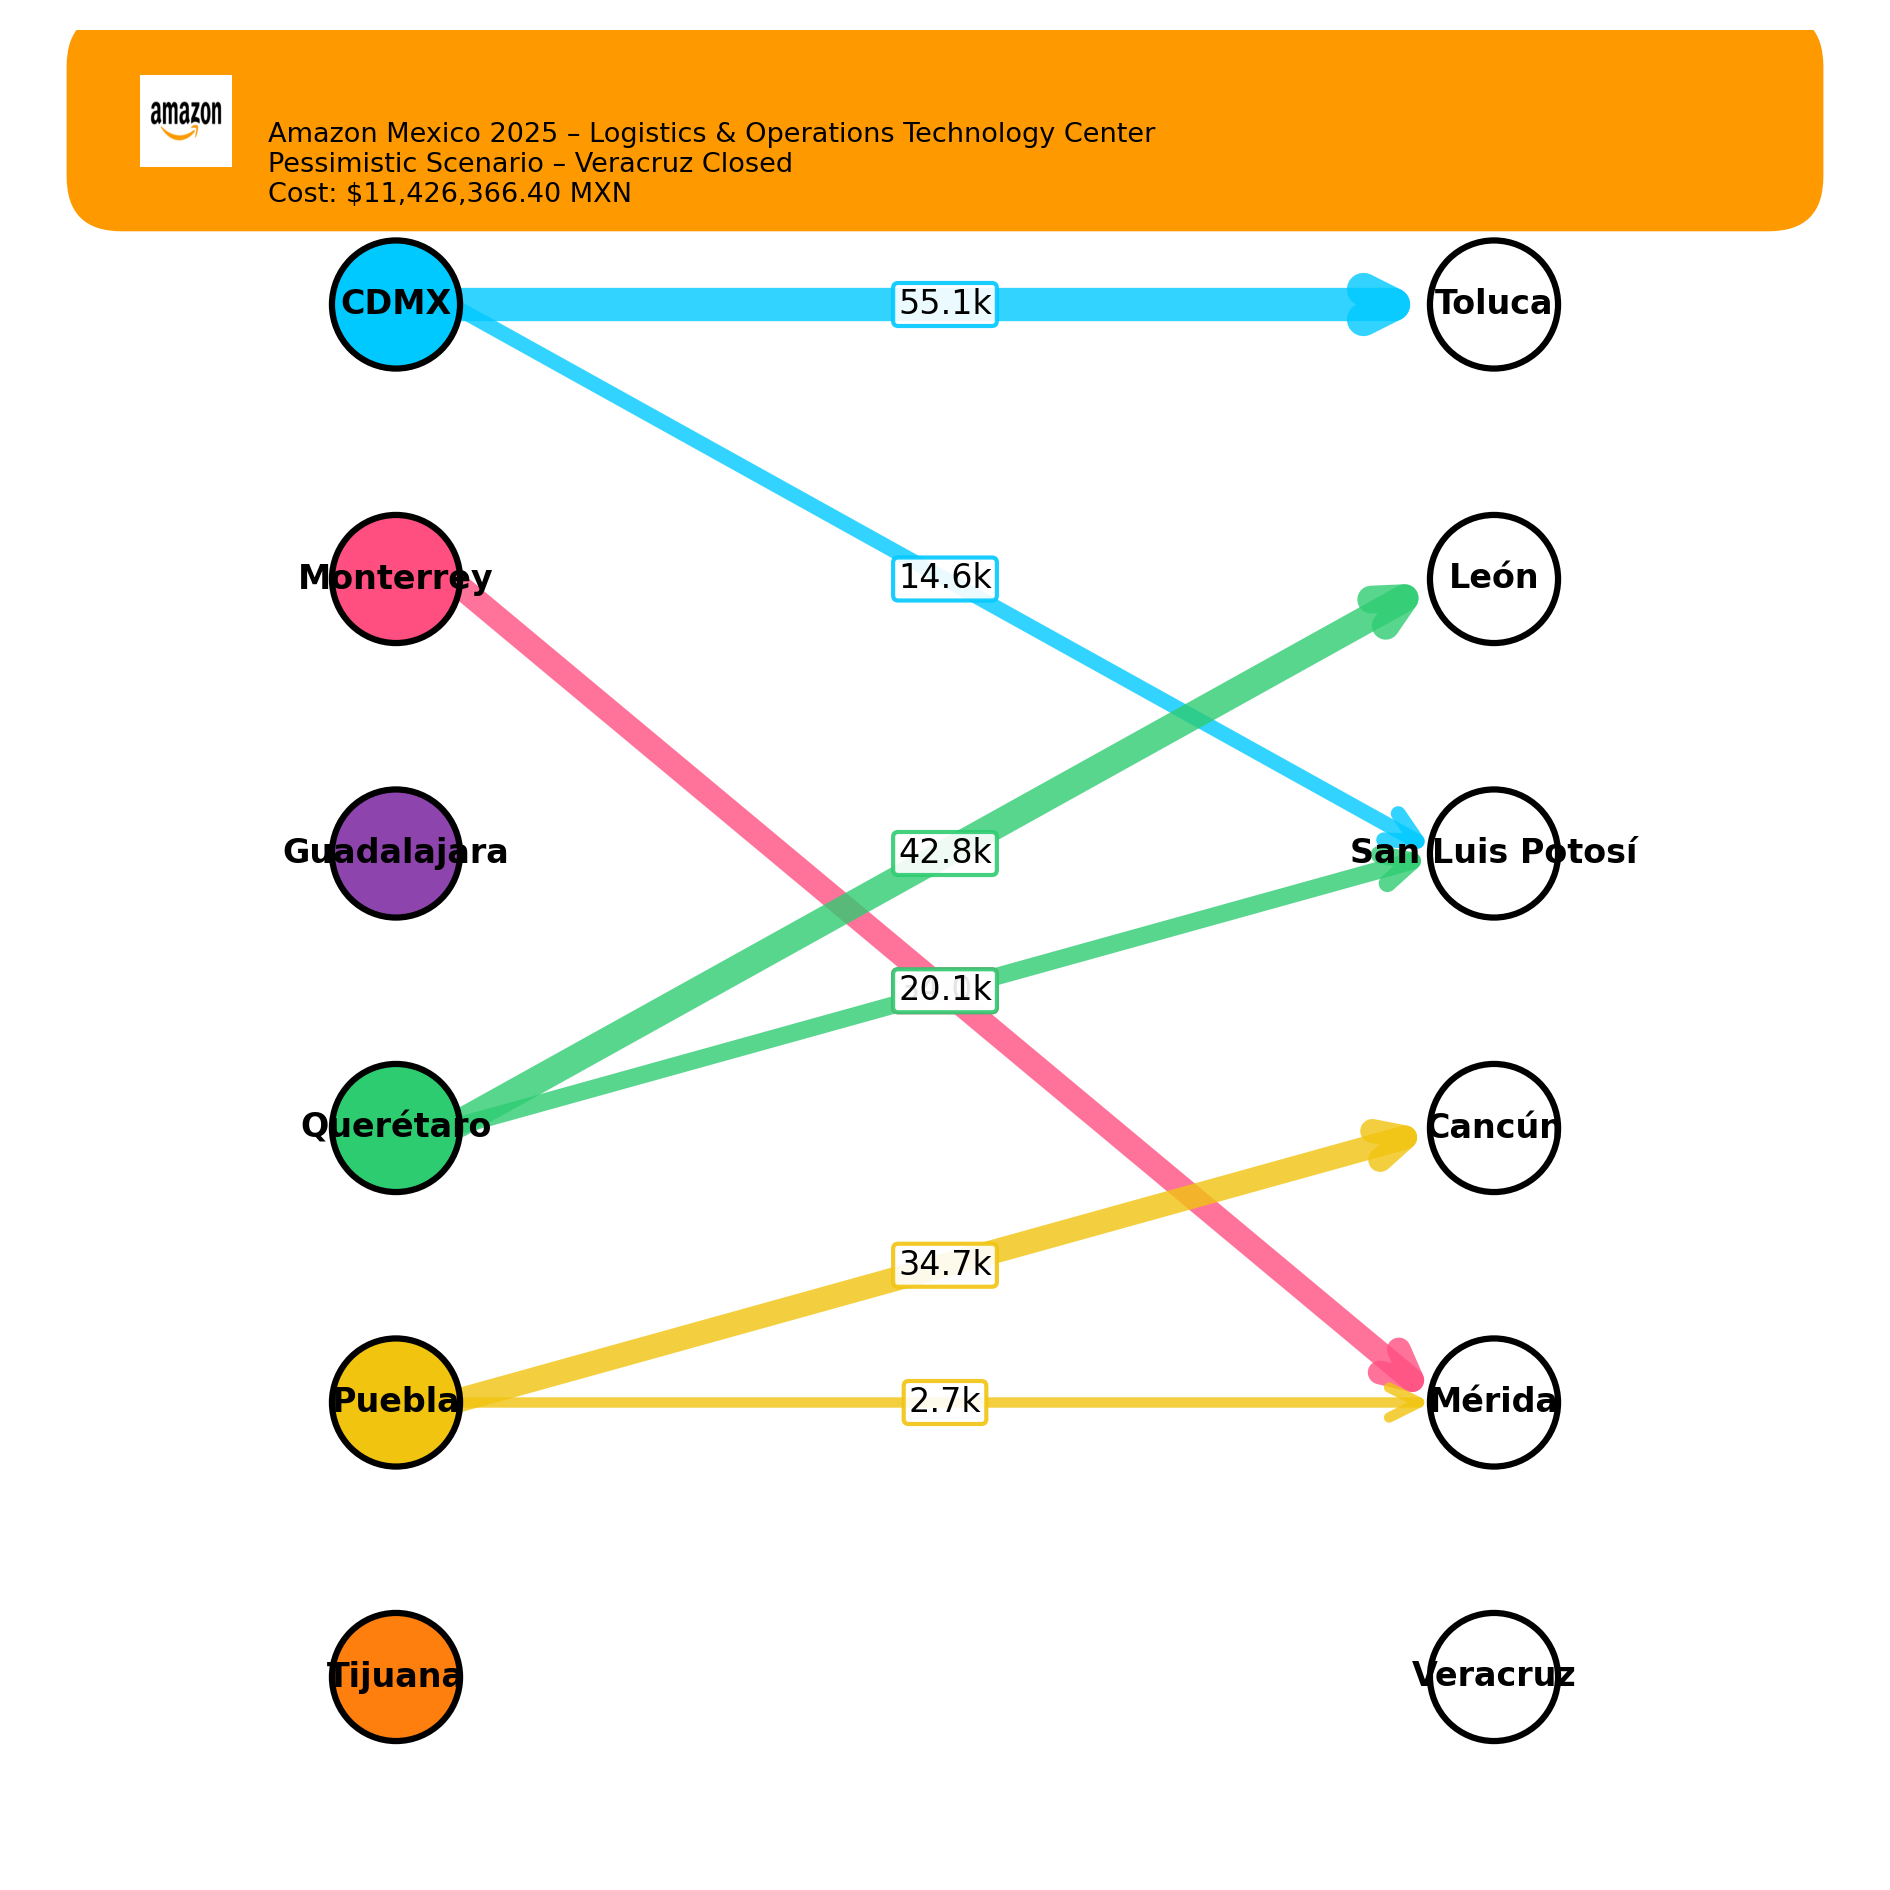

TypeError: expected str, bytes or os.PathLike object, not PngImageFile

In [12]:
student_id = 47  # <<--- CHANGE THIS TO YOUR LAST TWO DIGITS

datos = generar_datos_estudiante(student_id)

esc_base = resolver_problema(datos, multiplicador_costo=1.0, cerrar_veracruz=False)
esc_opt  = resolver_problema(datos, multiplicador_costo=0.9, cerrar_veracruz=False)
esc_pes  = resolver_problema(datos, multiplicador_costo=1.0, cerrar_veracruz=True)

print("STATUS:", esc_base["status"], esc_opt["status"], esc_pes["status"])
print("COSTS:")
print("  Base        :", esc_base["cost"])
print("  Optimistic  :", esc_opt["cost"])
print("  Pessimistic :", esc_pes["cost"])

# Export individual scenario PNGs
os.makedirs("results", exist_ok=True)
plot_scenario_square(datos, esc_base, "Base Scenario – Current Network",          "results/esc_base.png")
plot_scenario_square(datos, esc_opt,  "Optimistic Scenario – Reduced Costs (-10%)","results/esc_opt.png")
plot_scenario_square(datos, esc_pes,  "Pessimistic Scenario – Veracruz Closed",    "results/esc_pes.png")

# Build summary text for comparison panel + PDF
delta_opt = (esc_base["cost"]-esc_opt["cost"])/esc_base["cost"]*100.0
delta_pes = (esc_pes["cost"]-esc_base["cost"])/esc_base["cost"]*100.0

summary = (
    f"BASE COST:        ${esc_base['cost']:,.2f} MXN\n"
    f"OPTIMISTIC COST:  ${esc_opt['cost']:,.2f} MXN  ( -{delta_opt:.1f}% )\n"
    f"PESSIMISTIC COST: ${esc_pes['cost']:,.2f} MXN  ( +{delta_pes:.1f}% )\n\n"
    "Recommendation:\n"
    "- Maintain alternative routing capacity in Southeast (Veracruz risk).\n"
    "- Exploit cost reduction opportunities where transport discounts apply.\n"
)

make_comparison_panel(
    "results/esc_base.png",
    "results/esc_opt.png",
    "results/esc_pes.png",
    summary,
    "results/panel_comparativo.png"
)

# Generate PDF with QR linking back to 'source proof'
qr_reference = "Amazon Logistics Simulation | ID=" + str(student_id)
make_pdf_infographic("results/panel_comparativo.png", qr_reference, "results/amazon_logistics_report.pdf")

print("\nFiles generated in ./results :")
print(" - esc_base.png")
print(" - esc_opt.png")
print(" - esc_pes.png")
print(" - panel_comparativo.png")
print(" - amazon_logistics_report.pdf")